In [ ]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 01.전체 데이터 학습을 통해 익월 예측값 구하는 코드

In [ ]:
# 데이터 불러오기
data0= pd.read_csv('F:/superpack/ppm05.csv', encoding='UTF-8')
data1= pd.read_csv('F:/superpack/ppm06.csv', encoding='UTF-8')

In [ ]:
# 데이터 확인
data1.head()

,sa_id,diff_otv_uji_gigan,ppv_gunsu_1m_nosuper,ppv_gunsu_2m_nosuper,ppv_gunsu_1m_movie,ppv_gunsu_2m_movie,ppv_gunsu_1m_ani,ppv_gunsu_2m_ani,ppv_gunsu_1m_sungin,ppv_gunsu_2m_sungin,...,view_timeup_youtube_2m,aprod_change_gesu_all,aprod_prom_change_all,aprod_change_gesu_movie,aprod_prom_change_movie,aprod_change_gesu_sungin,aprod_prom_change_sungin,aprod_change_gesu_kids,aprod_prom_change_kids,yn
0,64037945045,1894,-0.428571,6.0,1.0,-1.0,-0.571429,7.0,0.0,0.0,...,0.0,4,0,1,0,0,0,1,0,0
1,64038717694,1885,0.000000,-1.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,64038802127,1877,0.000000,-1.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,3,0,1,0,0,0,0,0,0
3,64039991660,1871,2.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,1,0,0,0,0,0,0,0,0
4,64041401113,1852,-0.500000,0.0,-1.0,2.0,0.000000,0.0,0.0,0.0,...,0.0,3,0,1,0,0,0,0,0,0


In [ ]:
# 성능 예측 코드
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# 정확도, 정밀도, 재현율 구하는 함수
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [ ]:
# 데이터 전처리(금월)
y = data0[['yn']] #종속 변수
X = data0.drop(['yn', 'sa_id'], axis=1) #독립 면수

# 원핫인코딩 (범주형은 숫자형으로)
#X_data = pd.get_dummies(X)

In [ ]:
# 데이터 전처리(익월)
y1 = data1[['yn']]
X1 = data1.drop(['yn', 'sa_id'], axis=1)

# 원핫인코딩 (범주형은 숫자형으로)
#X_data1 = pd.get_dummies(X1)

In [ ]:
X = X.fillna(0)

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     yn   R-squared (uncentered):                   0.237
Model:                            OLS   Adj. R-squared (uncentered):              0.234
Method:                 Least Squares   F-statistic:                              78.02
Date:                Tue, 29 Aug 2023   Prob (F-statistic):                        0.00
Time:                        11:07:31   Log-Likelihood:                         -2325.1
No. Observations:               57801   AIC:                                      5108.
Df Residuals:                   57572   BIC:                                      7161.
Df Model:                         229                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
diff_otv_uji_gigan                  3.892e-06   8.98e-07      4.332      0.000    2.13e-06    5.65e-06
ppv_gunsu_1m_nosuper                  -0.0008      0.002     -0.464      0.643      -0.004       0.002
ppv_gunsu_2m_nosuper                  -0.0016      0.002     -0.962      0.336      -0.005       0.002
ppv_gunsu_1m_movie                    -0.0017      0.003     -0.635      0.526      -0.007       0.004
ppv_gunsu_2m_movie                    -0.0007      0.003     -0.269      0.788      -0.006       0.004
ppv_gunsu_1m_ani                       0.0020      0.002      1.126      0.260      -0.002       0.006
ppv_gunsu_2m_ani                       0.0021      0.002      1.092      0.275      -0.002       0.006
ppv_gunsu_1m_sungin                   -0.0015      0.003     -0.466      0.641      -0.008       0.005
ppv_gunsu_2m_sungin                   -0.0007      0.003     -0.215      0.830      -0.007       0.005
ppv_gunsu_1m_kid                       0.0001      0.005      0.028      0.978      -0.009       0.009
ppv_gunsu_2m_kid                       0.0063      0.006      1.014      0.311      -0.006       0.019
ppv_gunsu_1m_etc                       0.0003      0.002      0.158      0.875      -0.003       0.004
ppv_gunsu_2m_etc                       0.0023      0.002      1.443      0.149      -0.001       0.005
ppv_buyamt_1m_nosuper               8.617e-07   6.04e-07      1.427      0.154   -3.22e-07    2.05e-06
ppv_buyamt_2m_nosuper               -3.12e-07   5.87e-07     -0.531      0.595   -1.46e-06    8.39e-07
ppv_buyamt_3m_nosuper              -1.372e-07    8.1e-07     -0.169      0.865   -1.72e-06    1.45e-06
ppv_buyamt_1m_movie                -2.731e-07   6.45e-07     -0.424      0.672   -1.54e-06    9.91e-07
ppv_buyamt_2m_movie                -1.824e-07   6.32e-07     -0.289      0.773   -1.42e-06    1.06e-06
ppv_buyamt_3m_movie                 2.831e-07   8.46e-07      0.335      0.738   -1.37e-06    1.94e-06
ppv_buyamt_1m_ani                   7.432e-07   1.19e-06      0.625      0.532   -1.59e-06    3.07e-06
ppv_buyamt_2m_ani                  -2.285e-07   1.11e-06     -0.205      0.837   -2.41e-06    1.95e-06
ppv_buyamt_3m_ani                   1.647e-07    1.1e-06      0.149      0.881      -2e-06    2.33e-06
ppv_buyamt_1m_sungin               -7.016e-07   6.54e-07     -1.074      0.283   -1.98e-06    5.79e-07
ppv_buyamt_2m_sungin               -9.244e-07   8.36e-07     -1.106      0.269   -2.56e-06    7.13e-07
ppv_buyamt_3m_sungin                7.194e-07   9.29e-07      0.774      0.439    -1.1e-06    2.54e-06
ppv_buyamt_1m_kid                   2.237e-06    2.8e-06      0.798      0.425   -3.26e-06    7.73e-

In [ ]:
# 데이터 표준화 - MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#scaler = RobustScaler() #방법1 이상치 강함 
#scaler = StandardScaler() # 방법2
scaler = MinMaxScaler() # 방법3

In [ ]:
# 금월 익월 데이터 모두 표준화 변환 코드

# 데이터 셋 변환 .fit() 과 .transform() 호출.  
scaler.fit(X)
X_data_scaled = scaler.transform(X)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df_scaled = pd.DataFrame(data=X_data_scaled, columns=X.columns)

# 데이터 셋 변환 .fit() 과 .transform() 호출.  
scaler.fit(X1)
X_data_scaled1 = scaler.transform(X1)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df_scaled1 = pd.DataFrame(data=X_data_scaled1, columns=X1.columns)

In [ ]:
# 학습 : xgboost 사용
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=42 , max_depth=20, n_estimators=250, learning_rate=0.1)
xgb.fit(df_scaled,y)
y_xgb=xgb.predict(df_scaled1)

score_xgb=get_clf_eval(y1, y_xgb.reshape(-1,1))

In [ ]:
# 임계값에 따른 값
from sklearn.preprocessing import Binarizer
custom_threshold = 0.2
# 임계값 설정
pred_proba = xgb.predict_proba(df_scaled1)[:,1]
pred_proba_1 = pred_proba.reshape(-1,1)
custom_predict = Binarizer(threshold=custom_threshold).fit_transform(pred_proba_1)

# 결과값이 달라짐
get_clf_eval(y1, custom_predict) # 성능 측정

In [ ]:
# 익월 예측 값 엑셀로 추출 
pred_proba = xgb.predict_proba(df_scaled1)[:,1]
pred_proba_1 = pred_proba.reshape(-1,1)
ddf = pd.DataFrame(pred_proba_1)
sample = pd.concat([y1, ddf], axis=1)
sample.to_excel('C:/Users/20229069/Desktop/predict.xlsx') #결과값 엑설로 저장 코드

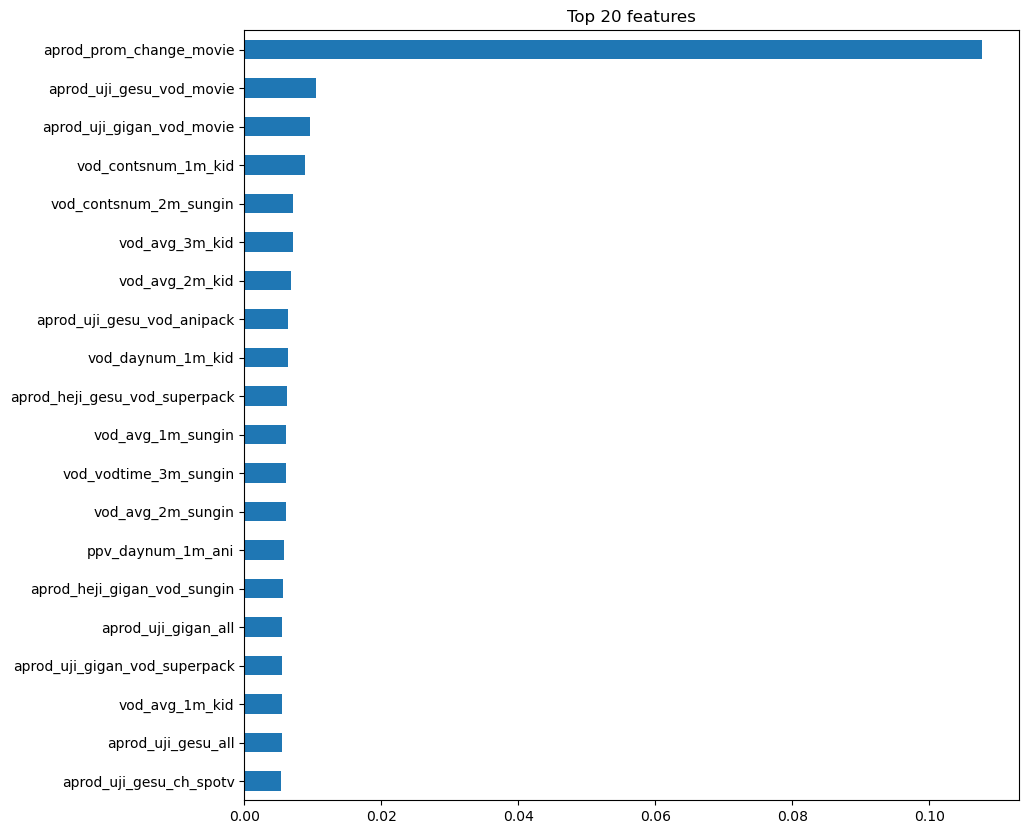

In [ ]:
# 변수 중요도
importances = pd.Series(xgb.feature_importances_, X1.columns)
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))

plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [ ]:
# 최적의 파라미터 구하는 코드
from xgboost import XGBClassifier
# 데이터 분리 (비율 유지)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.7, random_state=7, stratify=y) 

# 최적 파라미터 찾기 ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
etr = XGBClassifier()
parameters = {
    'max_depth': range(30,41,5),
    'n_estimators': range(100,301,100),
    'learning_rate' : [0.05,0.1,0.15]
}

etr_grid = GridSearchCV(etr,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

etr_grid.fit(x_train,y_train)

print(etr_grid.best_score_)
print(etr_grid.best_params_)

# 02. 한달 예측 확인

In [ ]:
# 데이터 불러오기
data0= pd.read_csv('F:/superpack/ppm05.csv', encoding='UTF-8')

In [ ]:
# 데이터 전처리
y = data0[['yn']] #종속 변수
X = data0.drop(['yn', 'sa_id'], axis=1) #독립 면수

# 원핫인코딩 (범주형은 숫자형으로)
#X_data = pd.get_dummies(X)

# 데이터 표준화 - MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#scaler = RobustScaler() #방법1 이상치 강함 
#scaler = StandardScaler() # 방법2
scaler = MinMaxScaler() # 방법3

# 데이터 셋 변환 .fit() 과 .transform() 호출.  
scaler.fit(X)
X_data_scaled = scaler.transform(X)

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
df_scaled = pd.DataFrame(data=X_data_scaled, columns=X.columns)

In [ ]:
# 성능 예측 코드
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# 정확도, 정밀도, 재현율 구하는 함수
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [ ]:
# 데이터 분리 (비율 유지)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.3, random_state=7, stratify=y) 

In [ ]:
# 학습 xgboost 사용
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=7, max_depth=25, n_estimators=250, learning_rate=0.1)
xgb.fit(x_train,y_train)
y_xgb=xgb.predict(x_test)

score_xgb=get_clf_eval(y_test, y_xgb.reshape(-1,1))

오차 행렬
[[15770   129]
 [ 1128   314]]
정확도: 0.9275, 정밀도: 0.7088, 재현율: 0.2178


In [ ]:
# 교차 검증
from sklearn.model_selection import StratifiedKFold

target = y
dtc = XGBClassifier(random_state=42 , max_depth=20, n_estimators=250, learning_rate=0.1)


kf = StratifiedKFold(n_splits=3, random_state = 42, shuffle = True)

# ExtraTreesRegression 교차 검증
etr_pred = np.zeros(target.shape[0])

for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    etr = XGBClassifier(random_state=7, max_depth=25, n_estimators=250, learning_rate=0.1)
    etr.fit(tr_x, tr_y)
    
    val_pred = etr.predict(val_x)
    val_nmae = get_clf_eval(val_y, val_pred.reshape(-1,1))
    

오차 행렬
[[17530   135]
 [ 1227   375]]
정확도: 0.9293, 정밀도: 0.7353, 재현율: 0.2341
오차 행렬
[[17495   170]
 [ 1230   372]]
정확도: 0.9273, 정밀도: 0.6863, 재현율: 0.2322
오차 행렬
[[17491   174]
 [ 1196   406]]
정확도: 0.9289, 정밀도: 0.7000, 재현율: 0.2534


In [ ]:
# 임계값에 따른 값
from sklearn.preprocessing import Binarizer
custom_threshold = 0.1
# 임계값 설정
pred_proba = xgb.predict_proba(x_test)[:,1]
pred_proba_1 = pred_proba.reshape(-1,1)
custom_predict = Binarizer(threshold=custom_threshold).fit_transform(pred_proba_1)

# 결과값이 달라짐
get_clf_eval(y_test, custom_predict) # 성능 측정

In [ ]:
# 익월 예측 값 엑셀로 추출 
pred_proba = xgb.predict_proba(X_data_scaled)[:,1]
pred_proba_1 = pred_proba.reshape(-1,1)
ddf = pd.DataFrame(pred_proba_1)
sample = pd.concat([y, ddf], axis=1)
sample.to_excel('C:/Users/20229069/Desktop/predict.xlsx') #결과값 엑설로 저장 코드

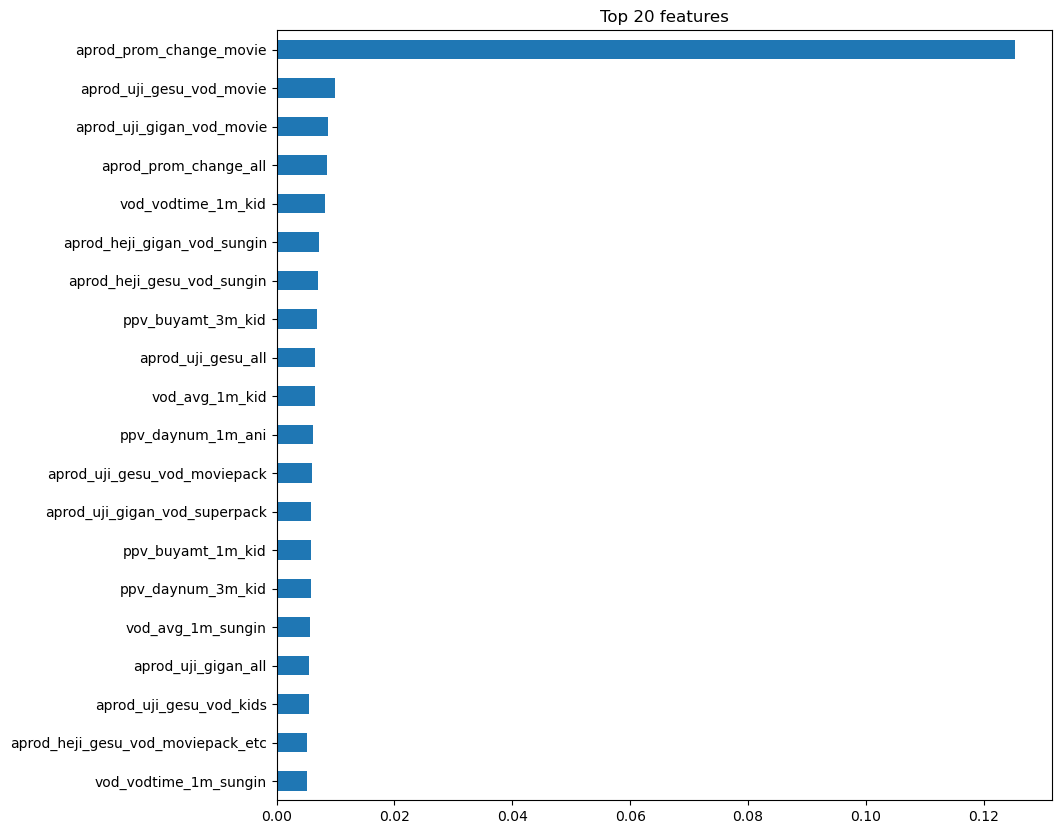

In [ ]:
# 변수 중요도
importances = pd.Series(xgb.feature_importances_, X.columns)
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))

plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();